In [38]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [29]:
def load_training_data():
    # Query the data in the OS
    PATH_TO_DATA = "Cotton_Leaf_Dataset/cotton/test"
    # Alternaria
    DISEASE_CLASSES = ["bacterial_blight", "curl_virus", "fussarium_wilt", "viral_disease", "healthy"] #, "Fungal_Disease", "Viral_Disease", "Healthy"]#, "Bacterial Blight", "Cercospora"]
    
    training_data = []
    
    for disease_class in DISEASE_CLASSES:
        path_to_class = os.path.join(PATH_TO_DATA, disease_class)
        index = 0
        
        for img in os.listdir(path_to_class):
            if img == ".DS_Store":
                continue
            # Read image using cv2
            picture_path = os.path.join(path_to_class, img)
            img_array_rgb = cv2.imread(picture_path)
            #normalize the image
            img_array_rgb_resized = cv2.resize(img_array_rgb, (120, 120))
            training_data.append(picture_path); 
            
    return training_data 

In [40]:
def carve_out_main_image():
    
    tr_data = load_training_data();
    
    for images in tr_data:
        # Load the image
        image = cv2.imread(images)

        # Convert the image to grayscale
        grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)

        # Perform image segmentation using Otsu's thresholding
        _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours in the thresholded image
        contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask for the largest contour
        mask = np.zeros_like(grayscale)
        cv2.drawContours(mask, [largest_contour], 0, 255, -1)

        # Apply the mask to the original image
        result = cv2.bitwise_and(image, image, mask=mask)

        plt.imshow(result)
        plt.axis('off')
        plt.show()

In [30]:
def load_images():
    tr_data = load_training_data();
    
    for images in tr_data:
        # Load the image
        image = cv2.imread(images)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Initialize the ORB feature detector
        orb = cv2.ORB_create()

        # Detect keypoints and compute descriptors
        keypoints, descriptors = orb.detectAndCompute(gray, None)

        # Draw keypoints on the image
        image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        # Convert the image with keypoints to RGB (for matplotlib)
        image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

        # Display the image with keypoints using matplotlib
        plt.imshow(image_with_keypoints_rgb)
        plt.axis('off')
        plt.show()

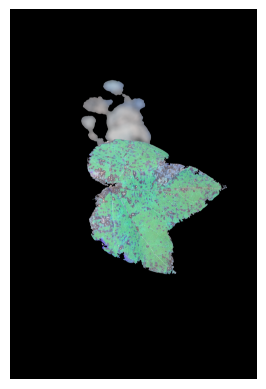

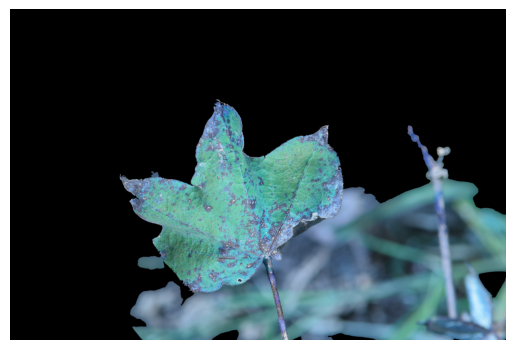

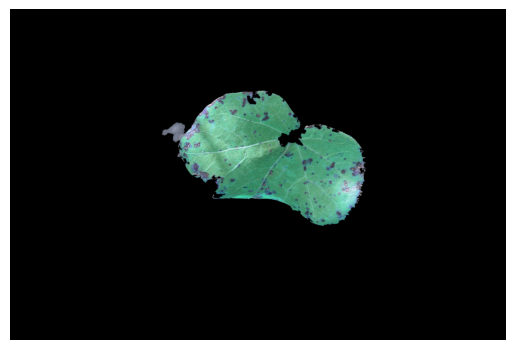

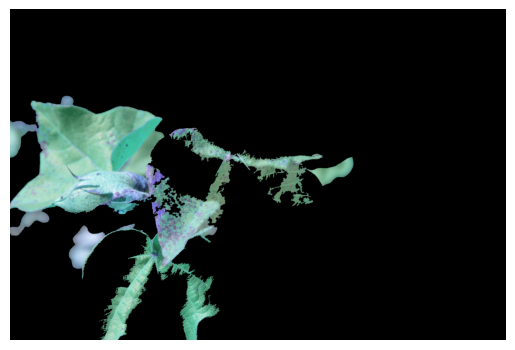

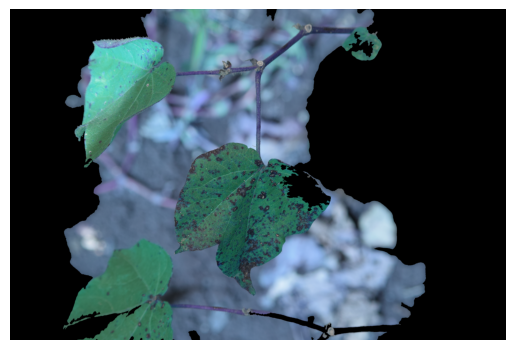

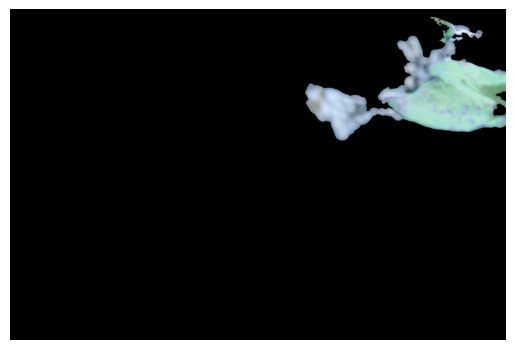

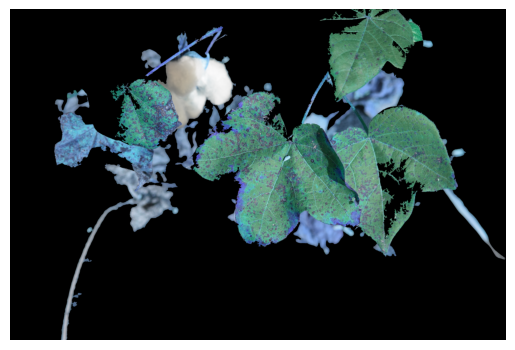

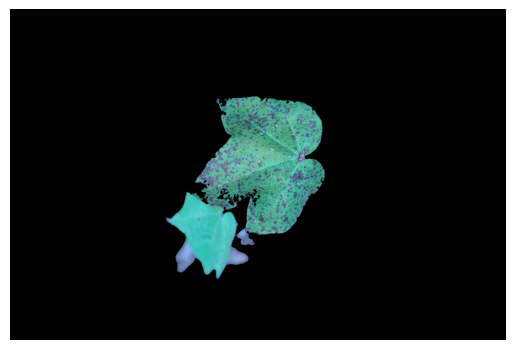

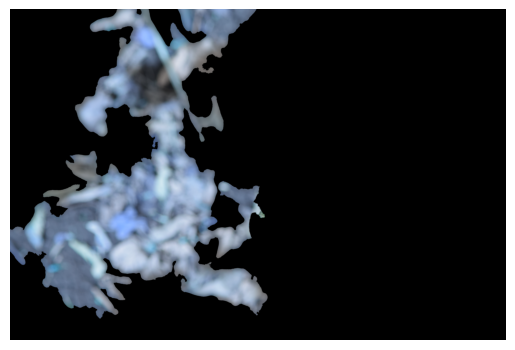

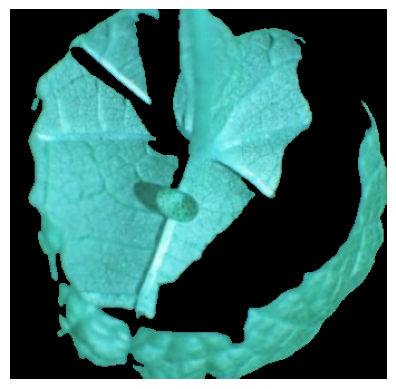

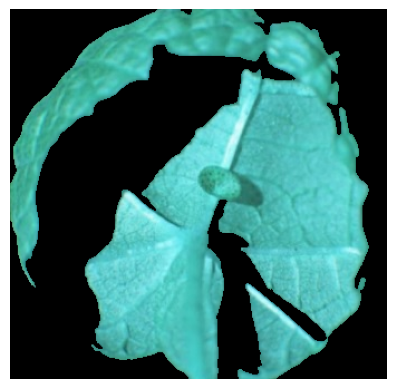

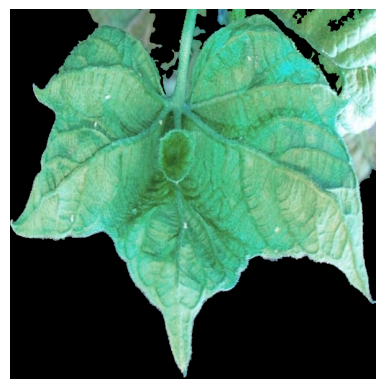

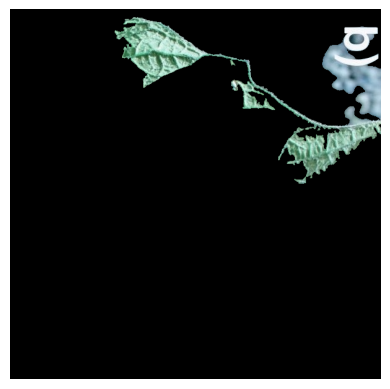

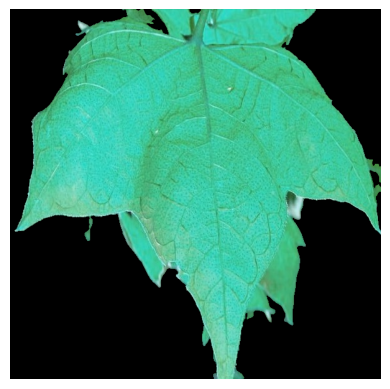

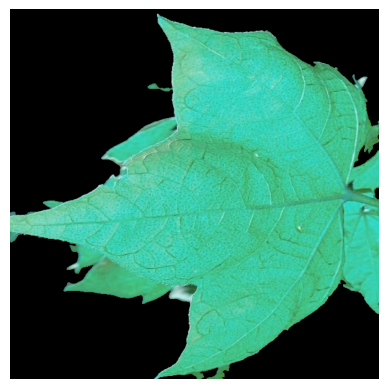

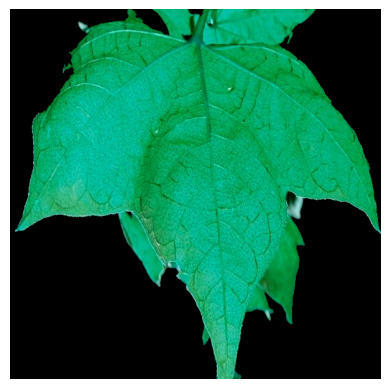

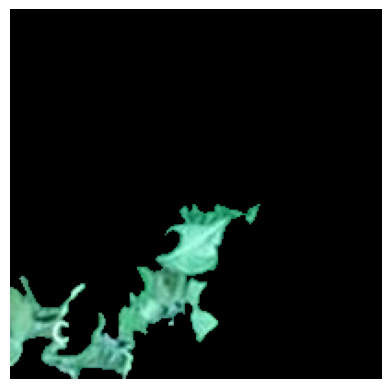

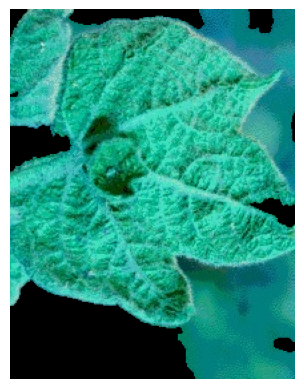

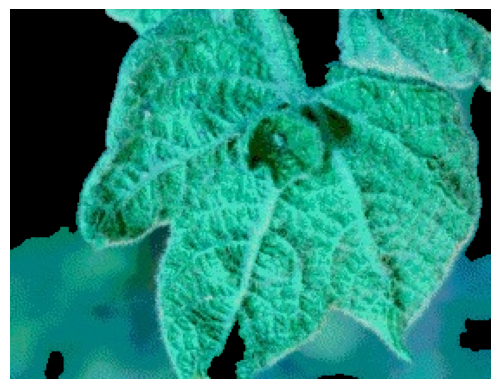

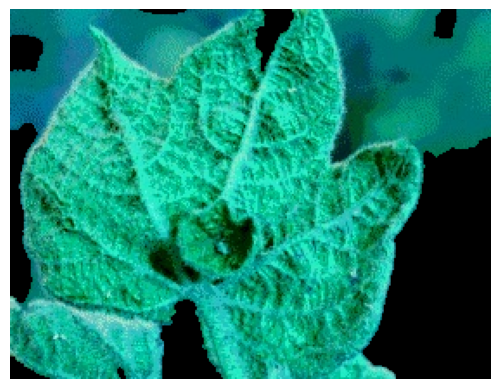

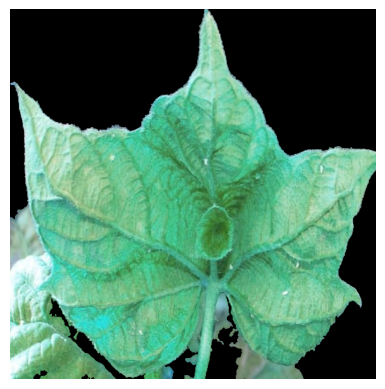

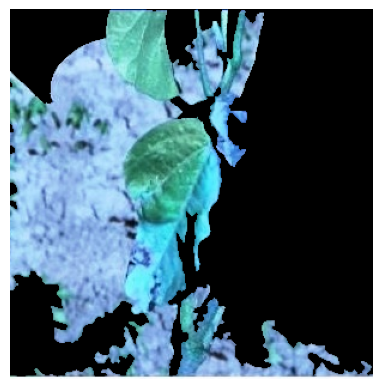

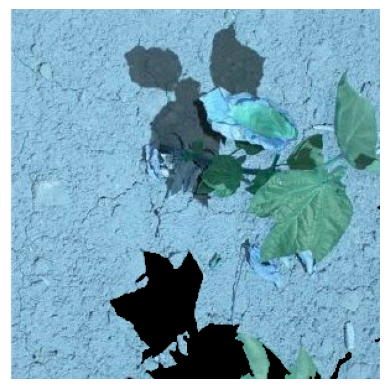

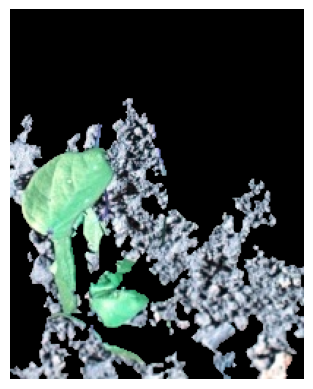

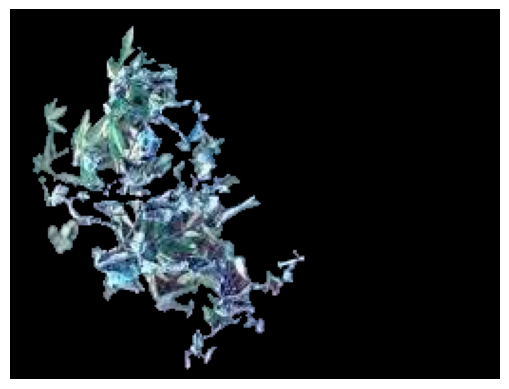

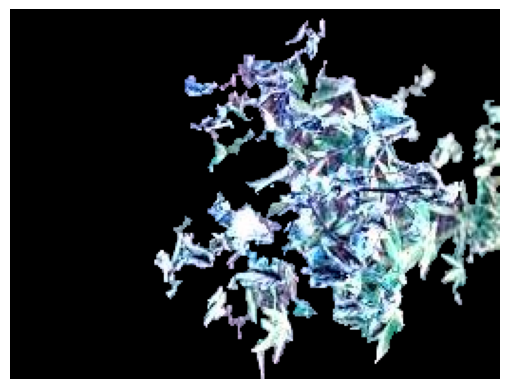

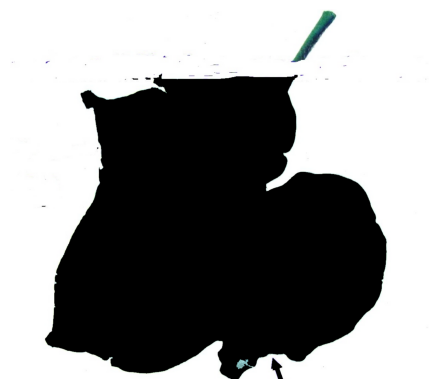

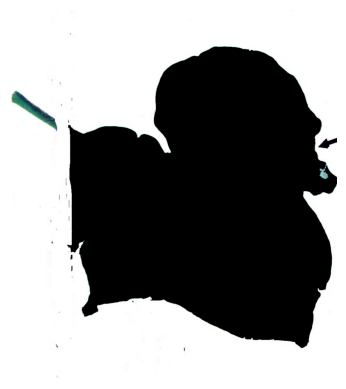

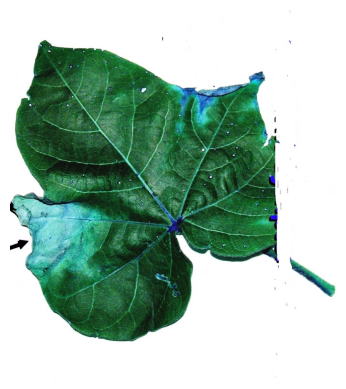

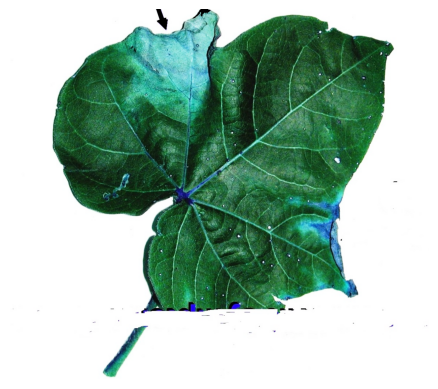

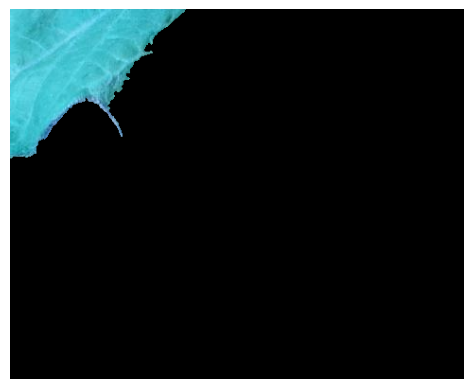

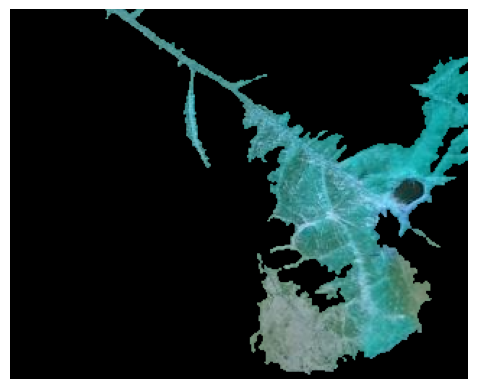

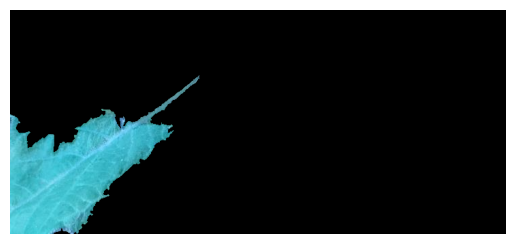

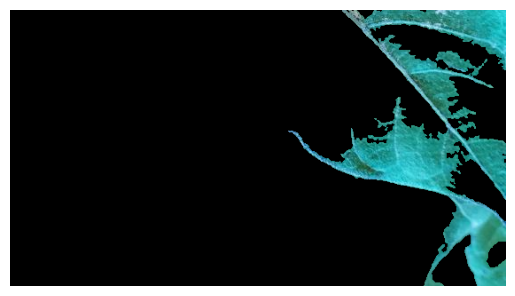

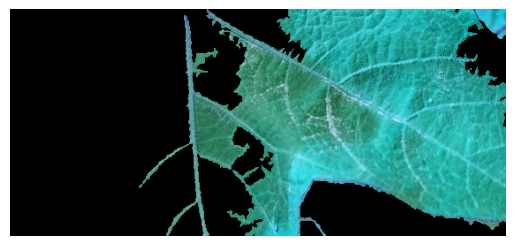

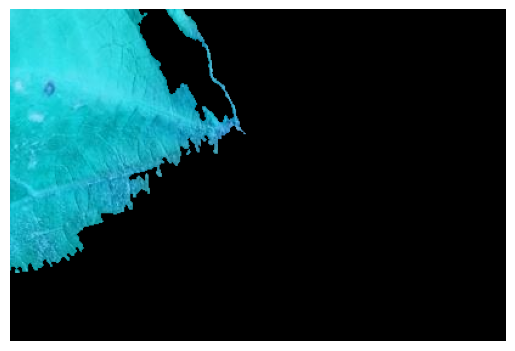

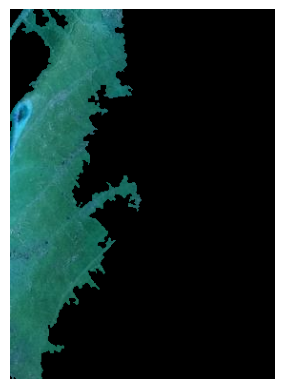

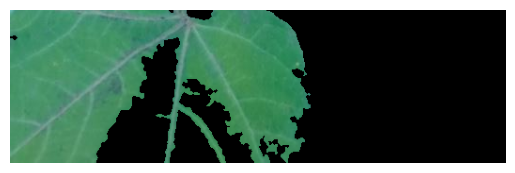

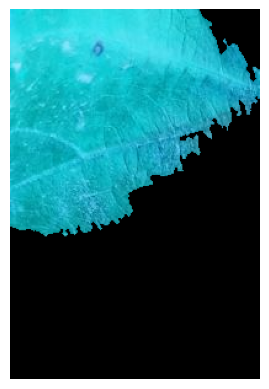

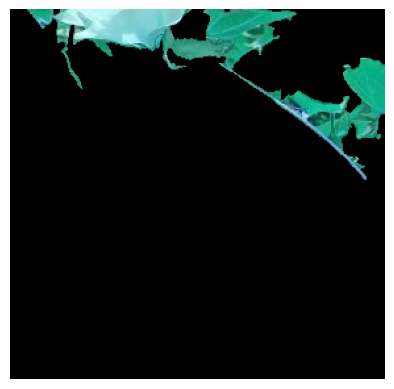

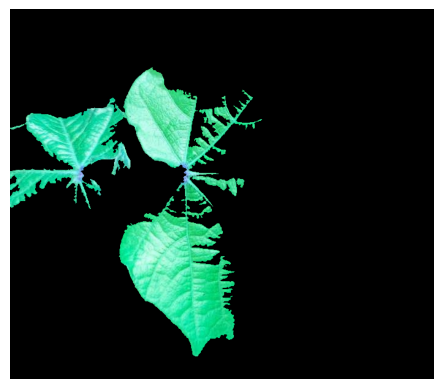

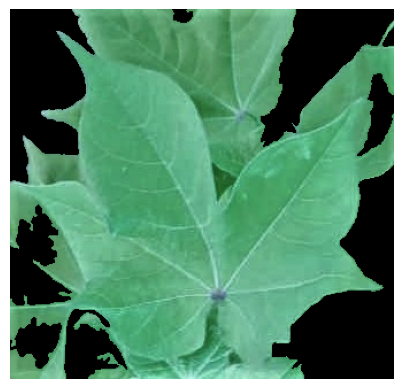

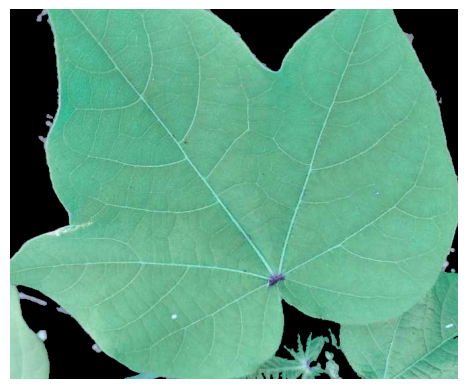

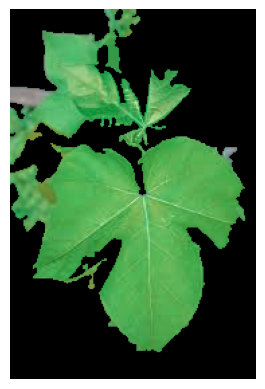

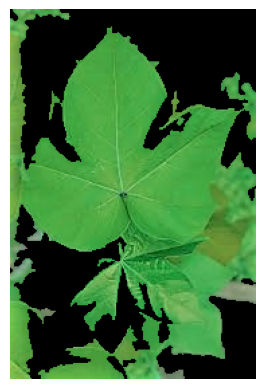

In [41]:
if __name__ == "__main__":
    carve_out_main_image()